In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro,ttest_ind,spearmanr,chi2_contingency,ttest_ind
from sklearn.datasets import load_wine,make_classification
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine=load_wine()

In [3]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df ["target"]= wine.target

In [5]:
data , target =make_classification(n_samples=400, n_features=5, n_classes=2)

In [6]:
df = pd.DataFrame(data,columns=[f"feature{i}" for i in range (1,6)])
df["target"] = target

In [7]:
wine = wine_df.copy()

In [8]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,1.275902,-0.735746,0.118706,-2.515585,2.400073,0
1,-1.157150,0.087605,-0.653898,1.109707,-0.745317,0
2,1.305470,1.236533,0.590292,-1.568181,1.227154,1
3,-0.345726,0.443312,-1.005213,-1.405654,1.899446,0
4,0.959759,-0.405100,0.176814,-1.704531,1.576041,1


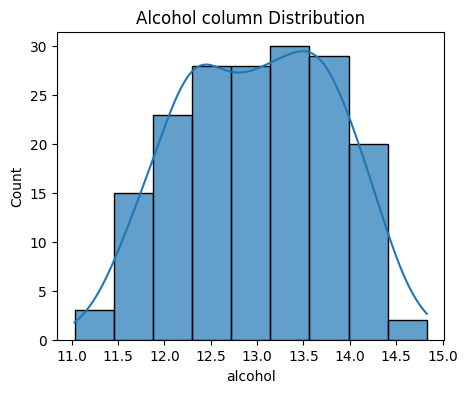

In [10]:
plt.figure(figsize=(5,4))
plt.title("Alcohol column Distribution")
sns.histplot(wine["alcohol"],kde= True, alpha=0.7)
plt.show()

In [11]:
# H0= Data is normally distributed
#Ha= Data is not normally distributed

# Checking whether to accept the null hypiothesis or reject it
sh_stat,sh_p= shapiro(wine["alcohol"])

print("Shapiro Statistical Value :",sh_stat)
print("Shapiro p_value:",sh_p)

alpha=0.05
if sh_p> alpha:
    print("Data is normally distributed (Accepting H0)")
else:
    print("Data is not normally distributed(Rejecting H0)")



Shapiro Statistical Value : 0.981804609298706
Shapiro p_value: 0.020050711929798126
Data is not normally distributed(Rejecting H0)


In [12]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

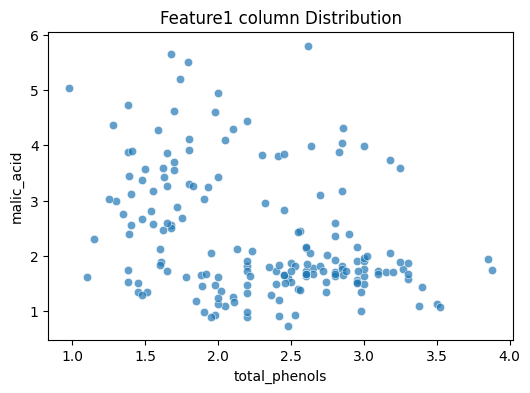

In [13]:
plt.figure(figsize=(6,4))
plt.title("Feature1 column Distribution")
sns.scatterplot(x=wine["total_phenols"], y=wine["malic_acid"],alpha=0.7)
plt.show()

In [16]:
# H0= Data is normally distributed
#Ha= Data is not normally distributed

# Checking whether to accept the null hypiothesis or reject it
sh_stat,sh_p= shapiro(wine["total_phenols"], wine["malic_acid"])

print("Shapiro Statistical Value :%.5f" %sh_stat)
print("Shapiro p_value:%.5f" %sh_p)

alpha=0.05
if sh_p> alpha:
    print("total_phenol and malic_acid are independent (Accepting H0)")
else:
    print("total_phenol and malic_acid are not independent(Rejecting H0)")


TypeError: shapiro() takes 1 positional argument but 2 were given

In [17]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


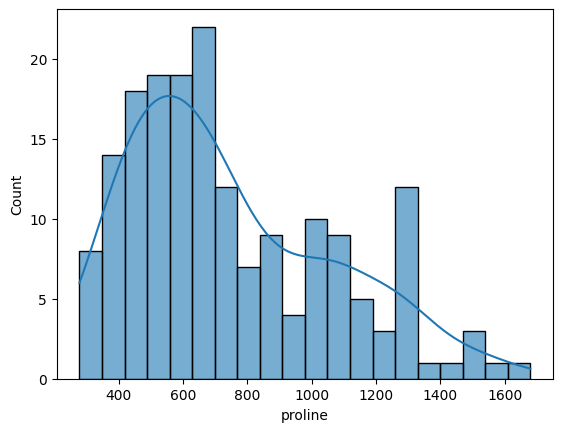

In [18]:
sns.histplot(x=wine["proline"],bins=20,alpha=0.6, legend=False, kde=True)
plt.show()

In [19]:
wine["proline"]. mean()

746.8932584269663

In [20]:
sample1 = np.random.choice(wine["proline"],size = 34)
sample2 = np.random.choice(wine["proline"],size = 34)

In [23]:
#H0 = sample 1 and sample2 are not equal 
#Ha = sample 1 and sample2 are equal

t_stats,t_p= ttest_ind(sample1, sample2)

print("t_test statistical value: %.5f"% t_stats) 
print("t_test p value: %.5f"%t_p)

alpha= 0.05
if t_p>alpha:
    print("sample1 and sample2 are not equal(Accepting H0)")
else:
    print("sample 1 and sample2 are equal(Rejecting H0)")


t_test statistical value: 0.61708
t_test p value: 0.53931
sample1 and sample2 are not equal(Accepting H0)


In [24]:
data= {
    "Gender":np.random.choice(["Male","Female"],80),
    "Subject":np.random.choice(["Med","Eng"],80)
}

In [25]:
course=pd.DataFrame(data)
course.head(10)

,Gender,Subject
0,Male,Eng
1,Male,Med
2,Male,Med
3,Female,Med
4,Female,Med
5,Female,Eng
6,Male,Eng
7,Male,Med
8,Male,Med
9,Female,Eng


In [26]:
crstb= pd.crosstab(course["Gender"],course["Subject"])

In [27]:
#H0: More males doing medical and female doing engineering
#Ha: it is not true

chi_stat,chi_p,_,_=chi2_contingency(crstb)

print("chi2 statistical value:%.5f"%chi_stat)
print("chi2 p value:%.5f"% chi_p)

alpha=0.05
if chi_p>alpha:
    print("more males doing medical and female doing engineering-H0")
else:
    print("it is not true -Ha")

chi2 statistical value:0.23659
chi2 p value:0.62668
more males doing medical and female doing engineering-H0
